# 1. Data Retrieving
#Wine recognition data is about three types of wines have 13 different chemical analysis of attributes, which is suitable for classification model
#totally there are 178 data points (class 1 = 59, class 2 = 71, class 3 = 48)

In [1]:
#Import data to Jupyter and name it to wine_p
#According to description, add column name to each column
#Change the data limitation in order to help check all values by setting 'width' to 15 and 'max_rows' to 200
import pandas as pd
wine_p= 'wine.data.csv'
wine= pd.read_csv(wine_p, sep=',', decimal='.',header= None, names=['type','Alcohol','Malic acid','Ash','Alcalinity of ash',
                                                              'Magnesium','Total phenols','Flavanoids','Nonflavanoid phenols','Proanthocyanins',
                                                              'Color intensity','Hue','OD280/OD315 of diluted wines',
                                                              'Proline'])
pd.set_option('display.width', 15, 'display.max_rows', 200)

In [2]:
#Checking each column data type, then claen the data
wine.dtypes
wine.shape
pd.isnull(wine).sum()

type                            0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

# 2.Data Exploration
#explore each column by different graphs
#explore pairs of relationship with different columns by confusion matrix and box plot

In [3]:
#2.1 Data Exploration for a single column
import matplotlib.pyplot as plt
wine['type'].value_counts().plot(kind='pie',figsize = (6,6),autopct='%.2f')
plt.title('Wine-type')
plt.show()


<Figure size 600x600 with 1 Axes>

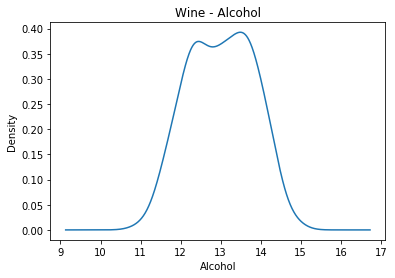

In [4]:
wine['Alcohol'].plot(kind='density')
plt.title('Wine - Alcohol')
plt.xlabel('Alcohol')
plt.show()

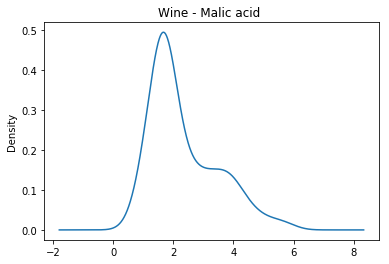

In [5]:
wine['Malic acid'].plot(kind='density')
plt.title('Wine - Malic acid ')
plt.show()

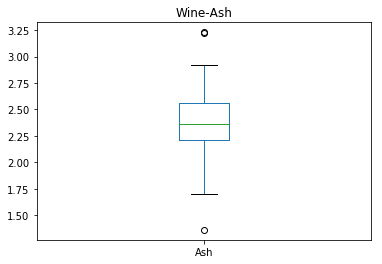

In [6]:
wine['Ash'].plot(kind='box')
plt.title('Wine-Ash')
plt.show()

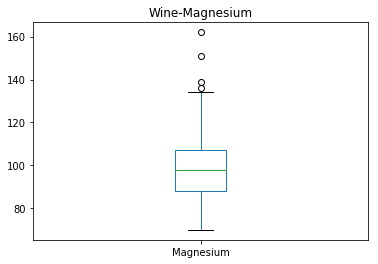

In [7]:
wine['Magnesium'].plot(kind='box')
plt.title('Wine-Magnesium')
plt.show()

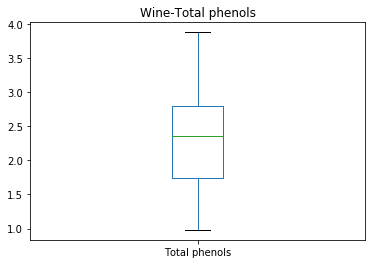

In [8]:
wine['Total phenols'].plot(kind='box')
plt.title('Wine-Total phenols')
plt.show()

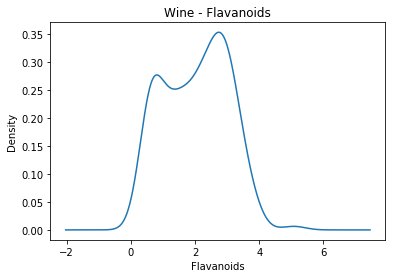

In [9]:
wine['Flavanoids'].plot(kind='density')
plt.title('Wine - Flavanoids')
plt.xlabel('Flavanoids')
plt.show()

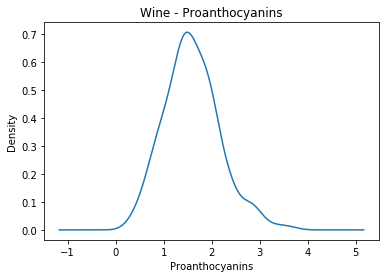

In [10]:
wine['Proanthocyanins'].plot(kind='density')
plt.title('Wine - Proanthocyanins')
plt.xlabel('Proanthocyanins')
plt.show()

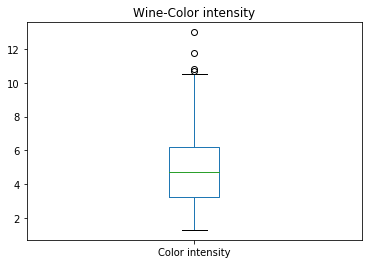

In [11]:
wine['Color intensity'].plot(kind='box')
plt.title('Wine-Color intensity')
plt.show()

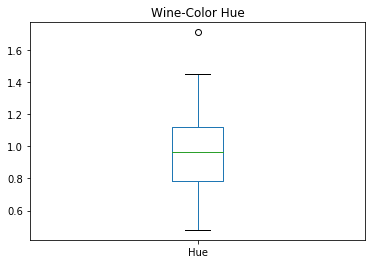

In [12]:
wine['Hue'].plot(kind='box')
plt.title('Wine-Color Hue')
plt.show()

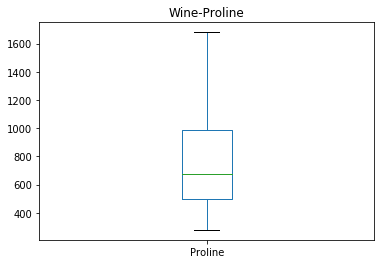

In [13]:
wine['Proline'].plot(kind='box')
plt.title('Wine-Proline')
plt.show()

In [ ]:
#2.2 Explore the relationship between pairs of attributes
from pandas.tools.plotting import scatter_matrix
wine_matrix=wine.drop(columns=['type'])
scatter_matrix(wine_matrix,alpha=0.2,figsize=(24,24),diagonal='hist')
plt.show()

/Users/user/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:4: FutureWarning: 'pandas.tools.plotting.scatter_matrix' is deprecated, import 'pandas.plotting.scatter_matrix' instead.
  after removing the cwd from sys.path.


In [ ]:
wine.plot(kind='scatter',x=6,y=7)
plt.title('Wine Flavanoids and Total phenols')
plt.show()

In [ ]:
wine.boxplot(column='Flavanoids',by='type',figsize=(7,6))
plt.title('Wine Flavanoids and Type')
plt.show()

In [ ]:
wine.boxplot(column='Proline',by='type',figsize=(7,6))
plt.title('Proline Flavanoids and Type')
plt.show()

# 3. Data Modelling: KNN Classification &  Decision Tree
#K-Folds Cross-Validation to tune parameter for KNN model
#Select features with hill climbing technique
#confusion_matrix and classifcation_report
#based on tree visualization to try different parameters for decision tree classifier

In [ ]:
# Set 'type' as target feature
# Before fit data into KNN learn model, target need to be deleted to prevent data leakage
target_feature = wine['type']
wine = wine.drop(columns=['type'])

In [ ]:
# K-Fold Cross-Validation to select parameter for KNN model
# Splite target_features to 5 parts, each part will be train 80% data, and test 20%
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5, random_state = 4)

In [ ]:
# check whether these data points have been split in correct ways
for train_index, test_index in kf.split(wine):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = wine.iloc[train_index,:], wine.iloc[test_index,:]
    y_train, y_test = target_feature.iloc[train_index], target_feature.iloc[test_index]

In [ ]:
# Try many times, according to the highest cores to select KNeighborsclassifier parameters, including n_neighbors, weights and power
# According to test,n_neighbors = 3, weights = 'distance' and power = 1 will get  better results
# select k from 3 to 10, set other parameters to default
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

kf = KFold(n_splits = 5, random_state = 0)
ks = range(3,11)
for i in range(len(ks)):
    for k, (train_index, test_index) in enumerate(kf.split(wine)):
        X_train, X_test = wine.iloc[train_index,:], wine.iloc[test_index,:]
        y_train, y_test = target_feature.iloc[train_index], target_feature.iloc[test_index]
        clf = KNeighborsClassifier(ks[i])
        clf.fit(X_train, y_train)
        print "[fold {0}] score: {1:.5f} ks num: {2}".format(k, clf.score(X_test, y_test), ks[i])
    print "--------------------"

In [ ]:
# select k from 3 to 10, set other parameters to weights = 'distance', p = 1
kf = KFold(n_splits = 5, random_state = 0)
ks = range(3,11)
for i in range(len(ks)):
    for k, (train_index, test_index) in enumerate(kf.split(wine)):
        X_train, X_test = wine.iloc[train_index,:], wine.iloc[test_index,:]
        y_train, y_test = target_feature.iloc[train_index], target_feature.iloc[test_index]
        clf = KNeighborsClassifier(ks[i], weights='distance', p=1)
        clf.fit(X_train, y_train)
        print "[fold {0}] score: {1:.5f} ks num: {2}".format(k, clf.score(X_test, y_test), ks[i])
    print "--------------------"
    
# k = 3, weights='distance', p=1 will be selected

In [ ]:
# select k from 3 to 10, set other parameters to weights = 'distance', p = 2
kf = KFold(n_splits = 5, random_state = 0)
ks = range(3,11)
for i in range(len(ks)):
    for k, (train_index, test_index) in enumerate(kf.split(wine)):
        X_train, X_test = wine.iloc[train_index,:], wine.iloc[test_index,:]
        y_train, y_test = target_feature.iloc[train_index], target_feature.iloc[test_index]
        clf = KNeighborsClassifier(ks[i], weights='distance', p=2)
        clf.fit(X_train, y_train)
        print "[fold {0}] score: {1:.5f} ks num: {2}".format(k, clf.score(X_test, y_test), ks[i])
    print "--------------------"
# k = 3, weights='distance', p=1 will be selected

# 3.1 50% train and 50% test
# 3.1.1  KNN classification


In [ ]:
# Shuffle 13 columns
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num))

In [ ]:
# Try the contribution of each column by added 1 once time
# If the score of results (X_test, y_test) is higher than before the relevant attributes and score will be recorded
# check many times to select the higher scores and the most relevant attributes 
# column index [0,8,6,2,11,9,7,3] will be selected

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine.iloc[: , new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target_feature, test_size=0.5, random_state=7)
    clf = KNeighborsClassifier(3, weights ='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print new_Ind
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)

In [ ]:
# According to results, select the higheset results with relevant attribute
# Create a new table named wine_feature
wine_feature = wine[['OD280/OD315 of diluted wines','Alcohol','Malic acid','Proanthocyanins','Color intensity']]

In [ ]:
# retriving the data
wine_feature.head(10)

In [ ]:
# Split the data into traing set and test set in 50% for training and 50% for testing
# Get confusion matrix to check correct rates
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.5, random_state = 10)
clf = KNeighborsClassifier(3, weights='distance', p = 1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm

In [ ]:
# get the 50% test training results
# including precision, recall and F1-score
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

# 3.1.2  Decision Tree 50% train and 50% test

In [ ]:
# Split the data into traing set and test set in 50% for training and 50% for testing
# Get confusion matrix to check correct rates
# set criterion between 'gini' and 'entropy'
# set min samples leaf between 2 to 9
# set max depth between 3 to 9 
# set min sample split between 2 to 9
# Calculate method, which will test all the situations by four nest loop one by one, the highest score will be selected
# min_samples_leaf = 3, max_depth = 3, min_samples_split = 2, criterion = 'gini' will be selected in this test
from sklearn.tree import DecisionTreeClassifier
cur_MaxScore = 0.0
ctn = ['gini', 'entropy']
msl = range (2,10)
md = range (3,10)
mss = range (2,10)
for c in range(len(ctn)):
    for a in range (len (mss)):
        for j in range (len (md)):
            for i in range(len(msl)):
                X_train, X_test, y_train, y_test = train_test_split(wine, target_feature,test_size=0.50,random_state=7)
                clf = DecisionTreeClassifier( criterion = ctn[c],  min_samples_leaf = msl[i], max_depth = md[j], min_samples_split = mss[a])
                fit = clf.fit(X_train, y_train)
                y_pre = fit.predict(X_test)
                cm = confusion_matrix(y_test, y_pre)
                cur_Score = clf.score(X_test, y_test)
                if cur_Score <= cur_MaxScore:
                     print 'ignore parameters'
                else:
                    cur_MaxScore = cur_Score
                    print cm
                    print classification_report(y_test,y_pre) + "the number of min_samples_leaf: " + str(i+2)+ '\n' + "the number of max_depth: " + str(j + 3) + '\n' + "the number of min_samples_split: " + str(a + 2) + "\n" + "the criterion is : " + ctn[c]
                    print " higher score " + str(cur_Score)
                    print "-----------------------------------"

In [ ]:
# try different results by changing random seed number
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.5, random_state = 10)
clf = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 3, min_samples_split = 2, criterion = 'gini')

fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test,y_pre)

# 3.2 60% train and 40% test
# 3.2.1 KNN classification

In [ ]:
# Shuffle 13 columns
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num))
# Try the contribution of each column by added 1 once time
# If the score of results (X_test, y_test) is higher than before the relevant attributes and score will be recorded
# check many times to select the higher scores and the most relevant attributes 
# column index [9,8,0,1,6] will be selected

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine.iloc[: , new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target_feature, test_size=0.4, random_state=7)
    clf = KNeighborsClassifier(3, weights ='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print new_Ind
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)

In [ ]:
# According to results, select the higheset results with relevant attribute
# Create a new table named wine_feature
wine_feature = wine[['Color intensity','Proanthocyanins','Alcohol','Malic acid','Flavanoids']]

In [ ]:
# retriving the data
wine_feature.head(10)

In [ ]:
# Split the data into traing set and test set in 60% for training and 40% for testing
# Get confusion matrix to check correct rates
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.4, random_state = 10)
clf = KNeighborsClassifier(3, weights='distance', p = 1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm

In [ ]:
# get the 40% test training results
# including precision, recall and F1-score
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

# 3.2.2 Decision Tree Classification

In [ ]:
# Split the data into traing set and test set in 60% for training and 40% for testing
# Get confusion matrix to check correct rates
# set criterion between 'gini' and 'entropy'
# set min samples leaf between 2 to 9
# set max depth between 3 to 9 
# set min sample split between 2 to 9
# Calculate method, which will test all the situations by four nest loop one by one, the highest score will be selected
# min_samples_leaf = 3, max_depth = 3, min_samples_split = 2, criterion = 'gini' will be selected in this test
cur_MaxScore = 0.0
ctn = ['gini', 'entropy']
msl = range (2,10)
md = range (3,10)
mss = range (2,10)
for c in range(len(ctn)):
    for a in range (len (mss)):
        for j in range (len (md)):
            for i in range(len(msl)):
                X_train, X_test, y_train, y_test = train_test_split(wine, target_feature,test_size=0.40,random_state=7)
                clf = DecisionTreeClassifier( criterion = ctn[c],  min_samples_leaf = msl[i], max_depth = md[j], min_samples_split = mss[a])
                fit = clf.fit(X_train, y_train)
                y_pre = fit.predict(X_test)
                cm = confusion_matrix(y_test, y_pre)
                cur_Score = clf.score(X_test, y_test)
                if cur_Score <= cur_MaxScore:
                     print 'ignore parameters'
                else:
                    cur_MaxScore = cur_Score
                    print cm
                    print classification_report(y_test,y_pre) + "the number of min_samples_leaf: " + str(i+2)+ '\n' + "the number of max_depth: " + str(j + 3) + '\n' + "the number of min_samples_split: " + str(a + 2) + "\n" + "the criterion is : " + ctn[c]
                    print " higher score " + str(cur_Score)
                    print "-----------------------------------"

In [ ]:
# try different results by changing random seed number
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.4, random_state = 9)
clf = DecisionTreeClassifier(min_samples_leaf = 3, max_depth = 3, min_samples_split = 2, criterion = 'gini')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test,y_pre)

# 3.3 80% train and 20% test
# 3.3.1 KNN classification

In [ ]:
# Shuffle 13 columns
from sklearn.utils import shuffle
new_Ind = []
cur_MaxScore = 0.0
col_num = 13
col_Ind_Random = shuffle(range(0,col_num))
# Try the contribution of each column by added 1 once time
# If the score of results (X_test, y_test) is higher than before the relevant attributes and score will be recorded
# check many times to select the higher scores and the most relevant attributes 
# column index [11,2,9,0,10,1] will be selected

for cur_f in range(0, col_num):
    new_Ind.append(col_Ind_Random[cur_f])
    newData = wine.iloc[: , new_Ind]
    X_train, X_test, y_train, y_test = train_test_split(newData, target_feature, test_size=0.4, random_state=1)
    clf = KNeighborsClassifier(3, weights ='distance', p=1)
    fit = clf.fit(X_train, y_train)
    cur_Score = clf.score(X_test, y_test)
    if cur_Score < cur_MaxScore:
        new_Ind.remove(col_Ind_Random[cur_f])
    else:
        cur_MaxScore = cur_Score
        print new_Ind
        print "Score with " + str(len(new_Ind)) + " selected features: " + str(cur_Score)

In [ ]:
# According to results, select the higheset results with relevant attribute
# Create a new table named wine_feature
wine_feature = wine[['OD280/OD315 of diluted wines','Ash','Color intensity','Alcohol','Hue','Malic acid']]

In [ ]:
# retriving the data
wine_feature.head(10)

In [ ]:
# Split the data into traing set and test set in 80% for training and 20% for testing
# Get confusion matrix to check correct rates
from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.2, random_state = 10)
clf = KNeighborsClassifier(3, weights='distance', p = 1)
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm

In [ ]:
# get the 20% test training results
# including precision, recall and F1-score
from sklearn.metrics import classification_report
print classification_report(y_test,y_pre)

# 3.3.2 Decision Tree Classification

In [ ]:
# Split the data into traing set and test set in 80% for training and 20% for testing
# Get confusion matrix and classification correct rate to check correct rates
# set criterion between 'gini' and 'entropy'
# set min samples leaf between 2 to 9
# set max depth between 3 to 9 
# set min sample split between 2 to 9
# Calculate method, which will test all the situations by four nest loop one by one, the highest score will be selected
# min_samples_leaf = 2, max_depth = 4, min_samples_split = 2, criterion = 'gini' will be selected in this test
cur_MaxScore = 0.0
ctn = ['gini', 'entropy']
msl = range (2,10)
md = range (3,10)
mss = range (2,10)
for c in range(len(ctn)):
    for a in range (len (mss)):
        for j in range (len (md)):
            for i in range(len(msl)):
                X_train, X_test, y_train, y_test = train_test_split(wine, target_feature,test_size=0.20,random_state=15)
                clf = DecisionTreeClassifier( criterion = ctn[c],  min_samples_leaf = msl[i], max_depth = md[j], min_samples_split = mss[a])
                fit = clf.fit(X_train, y_train)
                y_pre = fit.predict(X_test)
                cm = confusion_matrix(y_test, y_pre)
                cur_Score = clf.score(X_test, y_test)
                if cur_Score <= cur_MaxScore:
                     print 'ignore parameters'
                else:
                    cur_MaxScore = cur_Score
                    print cm
                    print classification_report(y_test,y_pre) + "the number of min_samples_leaf: " + str(i+2)+ '\n' + "the number of max_depth: " + str(j + 3) + '\n' + "the number of min_samples_split: " + str(a + 2)  + "\n" + "the criterion is : " + ctn[c]
                    print "higher score " + str(cur_Score)
                    print "-----------------------------------"

In [ ]:
# try different results by changing random seed number
X_train, X_test, y_train, y_test = train_test_split(wine_feature, target_feature ,test_size=0.2, random_state = 10)
clf = DecisionTreeClassifier(min_samples_leaf = 2, max_depth = 4, min_samples_split = 2, criterion = 'gini')
fit = clf.fit(X_train, y_train)
y_pre = fit.predict(X_test)
cm = confusion_matrix(y_test, y_pre)
print cm
print classification_report(y_test,y_pre)